# Problem Statement

To buid a machine learning system that can predict what is the medical insurance cost of a person

# Work Flow

1. Data Collection -> Insurance Cost data based on some parameters such as what are the health issues that person is having and other such kind of things
2. EDA -> to understand the insights of the data, what is this data all about and other such kind of things
3. Feature Engineering -> make the data compatiable to go into Machine Learning model
4. Data splitting -> training data & test data
5. Model Building -> Building the model and evaluating on training data
6. Model Evaluation -> Evaluating on Test data
7. Comparison -> Comparing different models to choose the best model for predicting the charges.
8. Building a predictive System

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We are having 3 categorical features -> Sex, Smoker, region

# EDA

In [5]:
# checking for missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Statistical measures of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Numerical Variables**

In [7]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [8]:
# Numerical variables are usually of 2 type
# 1.Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [9]:
discrete_feature

['children']

In [10]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

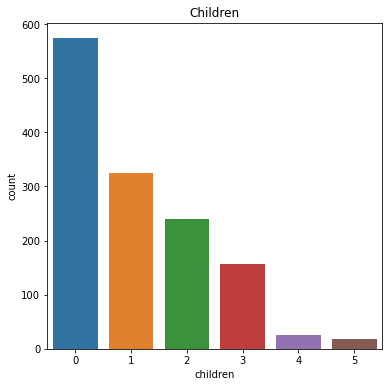

In [11]:
# distribution of children values

plt.figure(figsize=(6,6))
sb.countplot(x='children', data=data)
plt.title('Children')
plt.show()

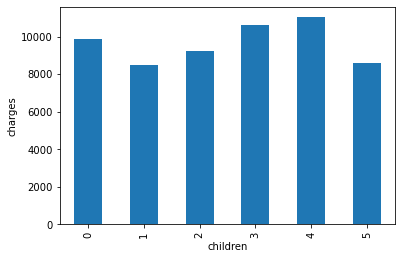

In [12]:
# Lets Find the realtionship between discrete feature and charges

for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['charges'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()

In [13]:
# 2.Continous variables

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: {}".format(len(continuous_feature)))

Continuous feature Count: 3


In [14]:
continuous_feature

['age', 'bmi', 'charges']

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


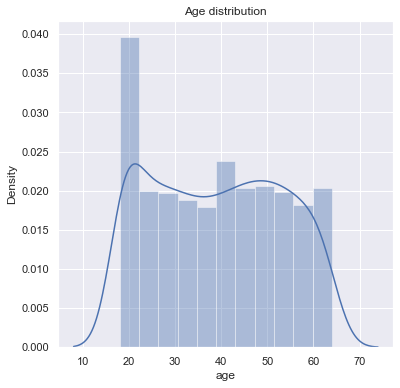

In [15]:
# distribution of Age values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.age)
plt.title('Age distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


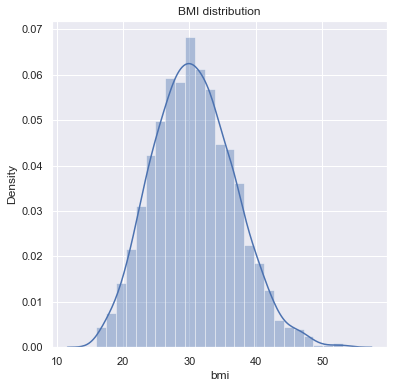

In [16]:
# distribution of bmi values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.bmi)
plt.title('BMI distribution')
plt.show()

Normal BMI range -> 18.5 to 24.9

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


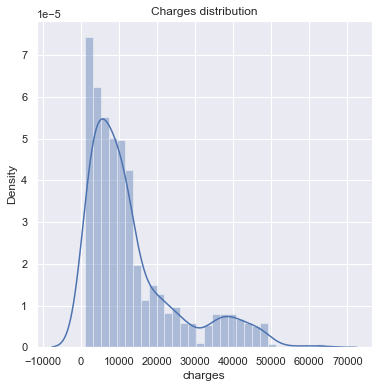

In [17]:
# distribution of charges values

plt.figure(figsize=(6,6))
sb.distplot(data.charges)
plt.title('Charges distribution')
plt.show()

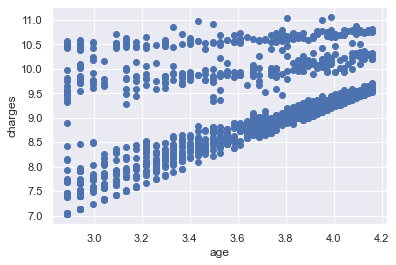

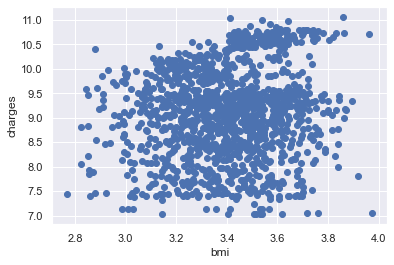

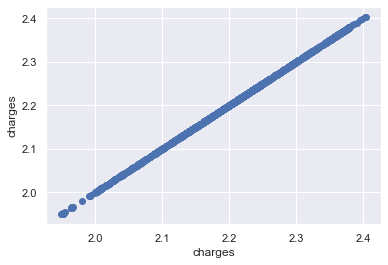

In [18]:
# We will be using logarithmic transformation for contiuous variables

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['charges'] = np.log(df['charges'])
        plt.scatter(df[feature],df['charges'])
        plt.xlabel(feature)
        plt.ylabel('charges')
        plt.show()


**Outliers**

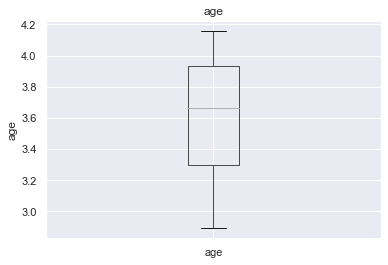

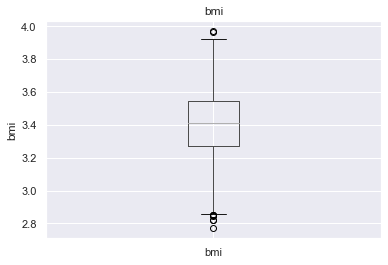

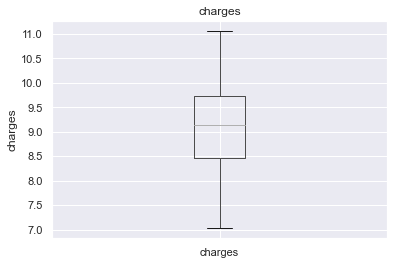

In [19]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [20]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['sex', 'smoker', 'region']

In [21]:
data[categorical_features].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [22]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

sex : 2
smoker : 2
region : 4


In [23]:
# distribution of Sex values

data.sex.value_counts().sort_index()

female    662
male      676
Name: sex, dtype: int64

In [24]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

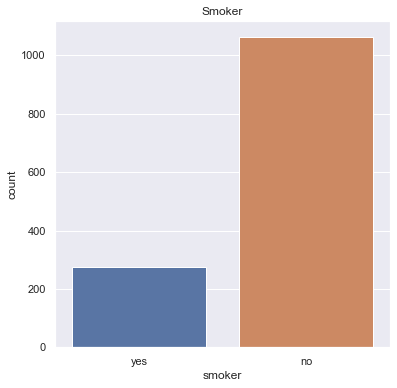

In [25]:
# distribution of smoker values

plt.figure(figsize=(6,6))
sb.countplot(x='smoker', data=data)
plt.title('Smoker')
plt.show()

In [26]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

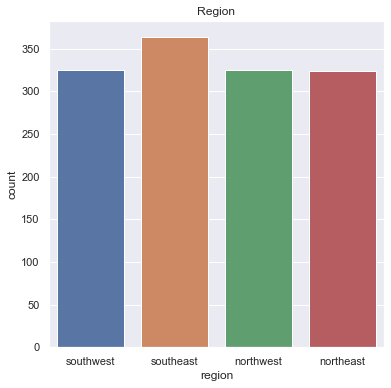

In [27]:
# distribution of region values

plt.figure(figsize=(6,6))
sb.countplot(x='region', data=data)
plt.title('Region')
plt.show()

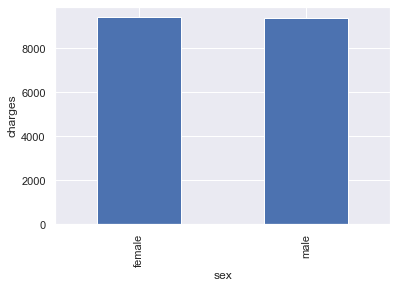

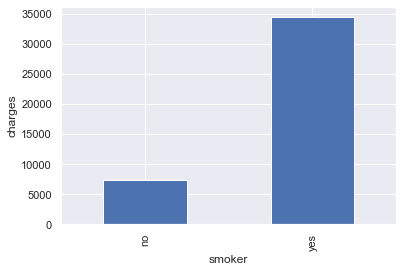

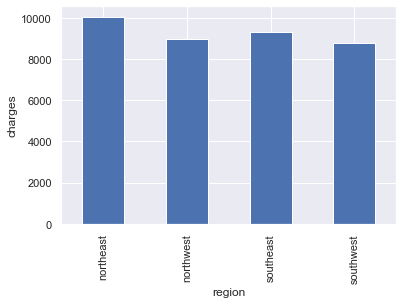

In [28]:
# relationship between categorical variable and dependent feature (charges)

for feature in categorical_features:
    df = data.copy()
    df.groupby(feature)['charges'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()

# Feature Engineering

In [29]:
# Encoding the Categorical Features

data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [30]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


**Feature Selection**

In [31]:
x = data.iloc[:,:-1]
y = data.charges

In [32]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

**Feature importance**

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor().fit(x,y)
model.feature_importances_

array([0.12881472, 0.01022651, 0.19248819, 0.02396415, 0.62059197,
       0.02391447])

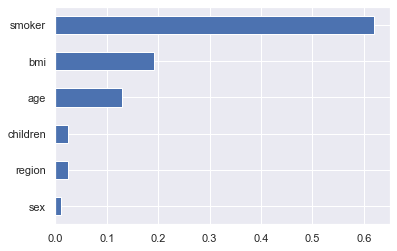

In [35]:
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.sort_values().plot(kind='barh')
plt.show()

**Correlation**

In [36]:
x.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000


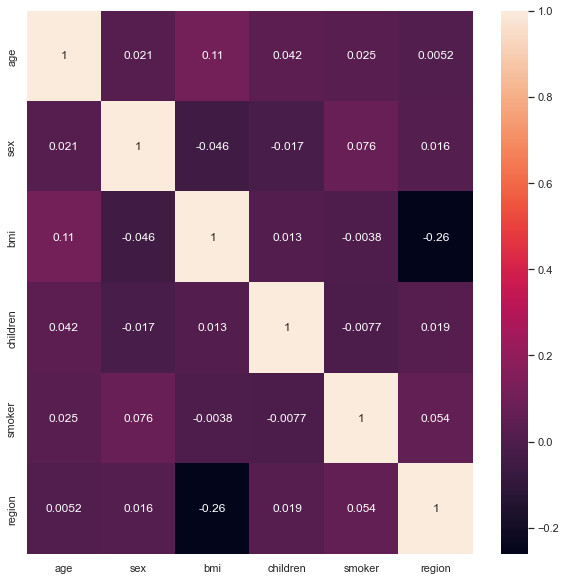

In [37]:
plt.figure(figsize=(10,10))
sb.heatmap(x.corr(), annot=True)
plt.show()

In [38]:
# lets remove the highly correlated features
threshold = 0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
correlation(x,threshold)

set()

As no multicollinearity exists, we will proceed further

# Data Splitting

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [41]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Random Forest Regressor

**Model Building**

In [42]:
# Loading random forest Model
from sklearn.ensemble import RandomForestRegressor

# loading the Model
rf_model = RandomForestRegressor().fit(x_train,y_train)

# R squared Value for trainig data
rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.9776057038154767


In [43]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = {'n_estimators':[100,200,300,400,500,600], 'min_samples_split':[5,10,15,20,25,30,35]}
search = GridSearchCV(rf_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  2.1min finished


In [44]:
# optimum parameter values
search.best_params_

{'min_samples_split': 30, 'n_estimators': 100}

In [45]:
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=30 , max_features='sqrt').fit(x_train,y_train)

In [46]:
# R squared Value for trainig data

rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.8583677993104609


**Model Evaluation**

In [47]:
# Prediction on test data
rf_test_pred = rf_model.predict(x_test)

In [48]:
# R squared Value for test data

rf_R2_test = metrics.r2_score(y_test, rf_test_pred)
print(rf_R2_test)

0.8217754728154839


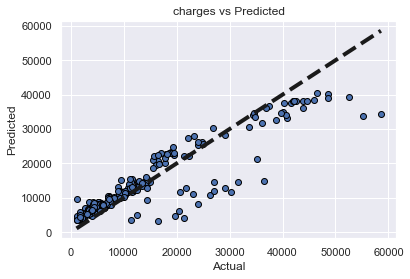

In [49]:
# Plot of predicted charges vs actual charges 

fig, ax = plt.subplots()
ax.scatter(y_test, rf_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [50]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": rf_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,4963.348144
1091,11286.53870,11866.128933
273,9617.66245,11574.603041
270,1719.43630,4237.839094
874,8891.13950,10158.493010
790,5662.22500,8443.901430
957,12609.88702,5086.382637
492,2196.47320,4062.110124
1125,14254.60820,14801.450845
794,7209.49180,9089.077265


In [51]:
print("Coefficient of determination : ", metrics.r2_score(y_test, rf_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, rf_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, rf_test_pred))

Coefficient of determination :  0.8217754728154839
Mean Squared Error :  26765895.260299545
Root Mean Squared Error :  5173.576640999874
Mean Absolute Error :  3422.770269265387


**Interpretation**
- From the R-squared value, we observe that our Random Forest model is accurate to 82%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Random Forest model is not good in predicting the charges.

# Bagging

**Model Building**

In [52]:
# loading the Bagging Model
bag_model = RandomForestRegressor().fit(x_train,y_train)

# R squared Value for trainig data
bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.9779616096051679


In [53]:
# hyperparameter tuning
parameters = {'n_estimators':[100,200,300,400,500,600], 'min_samples_split':[5,10,15,20,25,30,35]}
search = GridSearchCV(bag_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  2.1min finished


In [54]:
# optimum parameter values
search.best_params_

{'min_samples_split': 35, 'n_estimators': 300}

In [55]:
bag_model = RandomForestRegressor(n_estimators=300, min_samples_split=35 , max_features=None).fit(x_train,y_train)

In [56]:
# R squared Value for trainig data

bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.8904455317283481


**Model Evaluation**

In [57]:
# Prediction on test data
bag_test_pred = bag_model.predict(x_test)

In [58]:
# R squared Value for test data

bag_R2_test = metrics.r2_score(y_test, bag_test_pred)
print(bag_R2_test)

0.8630269887982003


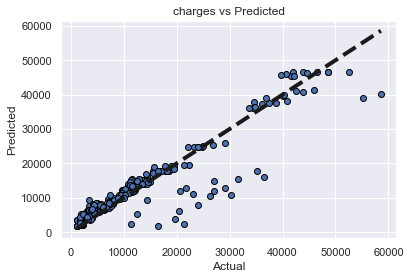

In [59]:
# Plot of predicted charges vs actual charges

fig, ax = plt.subplots()
ax.scatter(y_test, bag_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [60]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": bag_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,4699.271355
1091,11286.53870,11983.662867
273,9617.66245,12375.814366
270,1719.43630,3662.583424
874,8891.13950,9786.783818
790,5662.22500,8201.674565
957,12609.88702,5339.534116
492,2196.47320,2334.604483
1125,14254.60820,15191.085736
794,7209.49180,7676.755609


In [61]:
print("Coefficient of determination : ", metrics.r2_score(y_test, bag_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, bag_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, bag_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, bag_test_pred))

Coefficient of determination :  0.8630269887982003
Mean Squared Error :  20570711.1654704
Root Mean Squared Error :  4535.494588848101
Mean Absolute Error :  2507.5526897092327


**Interpretation**
- From the R-squared value, we observe that our Bagging model is accurate to 86%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Bagging model is not good in predicting the charges.

# Ada Boost Regressor

**Model Building**

In [62]:
# Loading Ada Boost Model
from sklearn.ensemble import AdaBoostRegressor

# loading the Model
Ada_model = AdaBoostRegressor().fit(x_train,y_train)

# R squared Value for trainig data
Ada_train_data_pred = Ada_model.predict(x_train)
Ada_Rsq_train = metrics.r2_score(y_train, Ada_train_data_pred)
print(Ada_Rsq_train)

0.8389428036116808


In [63]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = {'n_estimators': [100,200,300,400,500,600], "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]}
search = GridSearchCV(Ada_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   19.6s finished


In [64]:
# optimum parameter values
search.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [65]:
Ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.05).fit(x_train,y_train)

In [66]:
# R squared Value for trainig data

Ada_train_pred = Ada_model.predict(x_train)
Ada_R2_train = metrics.r2_score(y_train, Ada_train_pred)
print(Ada_R2_train)

0.8409984905468868


**Model Evaluation**

In [67]:
# Prediction on test data
Ada_test_pred = Ada_model.predict(x_test)

In [68]:
# R squared Value for test data

Ada_R2_test = metrics.r2_score(y_test, Ada_test_pred)
print(Ada_R2_test)

0.8303304287695301


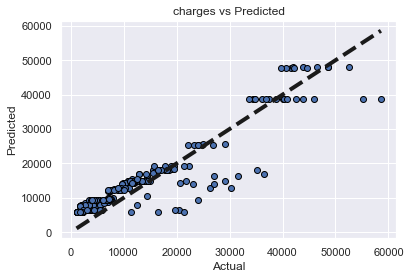

In [69]:
# Plot of predicted charges vs actual charges 

fig, ax = plt.subplots()
ax.scatter(y_test, Ada_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [70]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": Ada_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,6360.597304
1091,11286.53870,14447.131257
273,9617.66245,12999.404221
270,1719.43630,7599.293922
874,8891.13950,12349.913210
790,5662.22500,6425.280940
957,12609.88702,8050.145313
492,2196.47320,5753.527356
1125,14254.60820,14937.194202
794,7209.49180,9750.190716


In [71]:
print("Coefficient of determination : ", metrics.r2_score(y_test, Ada_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, Ada_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, Ada_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, Ada_test_pred))

Coefficient of determination :  0.8303304287695301
Mean Squared Error :  25481105.458133813
Root Mean Squared Error :  5047.881284076896
Mean Absolute Error :  3950.044710499345


**Interpretation**
- From the R-squared value, we observe that our Ada Boost model is accurate to 83%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Ada Boost model is not good in predicting the charges.

# Gradient Boost Regressor

**Model Building**

In [72]:
# Loading Gradient Boost Model
from sklearn.ensemble import GradientBoostingRegressor

# loading the Model
GB_model = GradientBoostingRegressor().fit(x_train,y_train)

# R squared Value for trainig data
GB_train_pred = GB_model.predict(x_train)
GB_R2_train = metrics.r2_score(y_train, GB_train_pred)
print(GB_R2_train)

0.9054241915138913


In [73]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = {'n_estimators':[10, 15, 20, 25, 30], 
              "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],}
search = GridSearchCV(GB_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   35.2s finished


In [74]:
# optimum parameter values
search.best_params_

{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 25}

In [75]:
GB_model = GradientBoostingRegressor(n_estimators=25, learning_rate=0.15, max_depth=3).fit(x_train,y_train)

In [76]:
# R squared Value for trainig data

GB_train_pred = GB_model.predict(x_train)
GB_R2_train = metrics.r2_score(y_train, GB_train_pred)
print(GB_R2_train)

0.8792809357772102


**Model Evaluation**

In [77]:
# Prediction on test data
GB_test_pred = GB_model.predict(x_test)

In [78]:
# R squared Value for test data

GB_R2_test = metrics.r2_score(y_test, GB_test_pred)
print(GB_R2_test)

0.8713136191933328


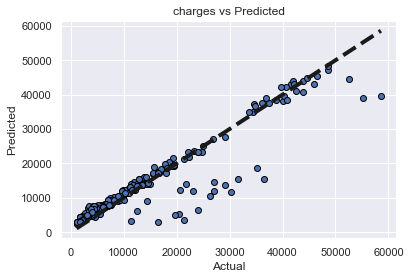

In [79]:
# Plot of predicted charges vs actual charges 

fig, ax = plt.subplots()
ax.scatter(y_test, GB_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [80]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": GB_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,4805.157821
1091,11286.53870,12359.031295
273,9617.66245,10994.061193
270,1719.43630,4518.209282
874,8891.13950,10170.012162
790,5662.22500,7937.031836
957,12609.88702,6093.828344
492,2196.47320,3371.169251
1125,14254.60820,14085.170701
794,7209.49180,8667.470122


In [81]:
print("Coefficient of determination : ", metrics.r2_score(y_test, GB_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, GB_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, GB_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, GB_test_pred))

Coefficient of determination :  0.8713136191933328
Mean Squared Error :  19326218.700147122
Root Mean Squared Error :  4396.159539887869
Mean Absolute Error :  2427.2302738957897


**Interpretation**
- From the R-squared value, we observe that our Gradient Boost model is accurate to 87%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Gradient Boost model is not good in predicting the charges.

# XG Boost Regressor

**Model Building**

In [82]:
# Loading XG Boost Model
from xgboost import XGBRegressor

# loading the Model
XGB_model = XGBRegressor().fit(x_train,y_train)

# R squared Value for trainig data
XGB_train_data_pred = XGB_model.predict(x_train)
XGB_Rsq_train = metrics.r2_score(y_train, XGB_train_data_pred)
print(XGB_Rsq_train)

0.9962665931681515


In [83]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

parameters = { "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

In [84]:
search = RandomizedSearchCV(XGB_model, param_distributions=parameters, scoring='neg_mean_squared_error', n_iter=5, cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.9s finished


In [85]:
search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
# optimum parameter values
search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [87]:
XGB_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=3,
             min_child_weight=7, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None).fit(x_train,y_train)

In [88]:
# R squared Value for trainig data

XGB_train_data_pred = XGB_model.predict(x_train)
XGB_Rsq_train = metrics.r2_score(y_train, XGB_train_data_pred)
print(XGB_Rsq_train)

0.9040652370664598


**Model Evaluation**

In [89]:
# Prediction on test data
XGB_test_data_pred = XGB_model.predict(x_test)

In [90]:
# R squared Value for test data
XGB_Rsq_test = metrics.r2_score(y_test, XGB_test_data_pred)
print(XGB_Rsq_test)

0.8520928646962774


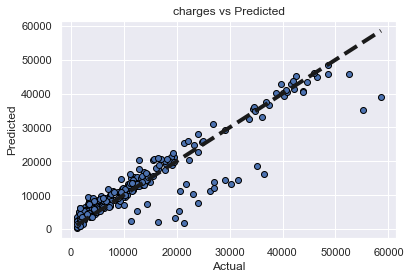

In [91]:
# Plot of predicted charges VS atual charges
fig, ax = plt.subplots()
ax.scatter(y_test, XGB_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [92]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": XGB_test_data_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,4336.579590
1091,11286.53870,12748.619141
273,9617.66245,11953.780273
270,1719.43630,2368.526123
874,8891.13950,10970.219727
790,5662.22500,9804.933594
957,12609.88702,5366.323242
492,2196.47320,3488.797607
1125,14254.60820,15439.136719
794,7209.49180,9402.741211


In [93]:
print("Coefficient of determination : ", metrics.r2_score(y_test, XGB_test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, XGB_test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, XGB_test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, XGB_test_data_pred))

Coefficient of determination :  0.8520928646962774
Mean Squared Error :  22212806.25248494
Root Mean Squared Error :  4713.046387686519
Mean Absolute Error :  2680.4291227758426


**Interpretation**
- From the R-squared value, we observe that our XG Boost model is accurate to 85%.
- As the mean square error, Root mean sqaure error values are not close to 0, which indicates that the XG Boost Regressor model is not good in predicting the charges.
- The Mean absolute error value is also not close to zero depecting that our XG Boost Regressor model is not good in predicting.

# Decision Tree Regressor

**Model Building**

In [94]:
# Loading decision tree Model
from sklearn.tree import DecisionTreeRegressor

# loading the Model
tree_model = DecisionTreeRegressor().fit(x_train,y_train)

# R squared Value for trainig data
tree_train_pred = tree_model.predict(x_train)
tree_R2_train = metrics.r2_score(y_train, tree_train_pred)
print(tree_R2_train)

1.0


In [95]:
# hyper parameter tuning
parameters = [{'min_samples_split':[5,10,15,20,25,30,35]}]
search = GridSearchCV(tree_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [96]:
# optimum parameter values
search.best_params_

{'min_samples_split': 35}

In [98]:
tree_model = DecisionTreeRegressor(min_samples_split=35).fit(x_train,y_train)

In [99]:
# Prediction on training data
tree_train_pred = tree_model.predict(x_train)

In [100]:
# R squared Value for trainig data

tree_R2_train = metrics.r2_score(y_train, tree_train_pred)
print(tree_R2_train)

0.8937907949686511


**Model Evaluation**

In [101]:
# Prediction on test data
tree_test_pred = tree_model.predict(x_test)

In [102]:
# R squared Value for test data

tree_R2_test = metrics.r2_score(y_test, tree_test_pred)
print(tree_R2_test)

0.8376231472289277


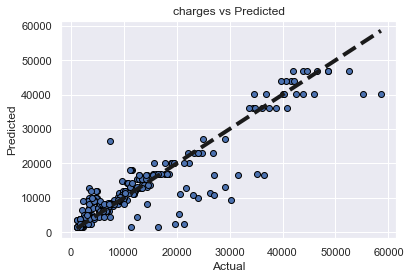

In [103]:
# Plot of predicted charges VS atual charges

fig, ax = plt.subplots()
ax.scatter(y_test, tree_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [104]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": tree_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,2450.420812
1091,11286.53870,12100.860382
273,9617.66245,14850.402670
270,1719.43630,3831.303267
874,8891.13950,8214.577982
790,5662.22500,8090.039491
957,12609.88702,4513.106223
492,2196.47320,2436.097961
1125,14254.60820,15347.550457
794,7209.49180,7744.103603


In [105]:
print("Coefficient of determination : ", metrics.r2_score(y_test, tree_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, tree_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, tree_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, tree_test_pred))

Coefficient of determination :  0.8376231472289277
Mean Squared Error :  24385879.444460597
Root Mean Squared Error :  4938.206095786262
Mean Absolute Error :  2793.914979604535


**Interpretation**
- From the R-squared value, we observe that our Decision Tree Regressor model is accurate to 8376%.
- As the mean square error, Root mean sqaure error & mean absolute error values are not close to 0, which indicates that the Decision Tree Regressor model is not good in predicting the charges.

# Comaprison

Decreasing order of accuracy is depicted as:

- Gradient Boost Regressor - 0.8713
- Bagging - 0.8630
- XG Boost Regressor - 0.8520
- Decision Tree Regressor - 0.8376
- Ada Boost Regressor - 0.8303
- Random Forest Regressor - 0.8217

# Building a predective system

In [ ]:
# input data -> (31, female=1, 25.74, 0, no=1, southeast=0)
# output ->  3756.6216


input_data = (31, 1, 25.74, 0, 1, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [ ]:
prediction = XG_model.predict(input_data_reshape)
print(prediction)

In [ ]:
# input data -> (43, male=0, 27.8, 0, yes=0, southwest=1)
# output ->  37829.7242


input_data = (43, 0, 27.8, 0, 0, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [ ]:
prediction = rf_model.predict(input_data_reshape)
print(prediction)